In [10]:
import sys

sys.path.append('lib')
from calculation_manager import CalculationManager
from cross_section import CrossSection

xs = CrossSection()
xs.set([[1.58, 0.02, 0.0, 1.0],[0.271, 0.0930, 0.168, 0.0]])
xs.set_smat( [[0.0, 0.0178], [0.0, 0.0]])
xs.calc_sigr()

delta = 1.0
albedo = -1.0
geom = [{'xs':xs, 'width':100}]

config = { 'geometry':geom, 'mesh_width':delta, "albedo": albedo}
        
calc_man = CalculationManager(config)
ret = calc_man.run()

keff = calc_man.get_keff()

print ("ret = ", ret, ", keff = ", keff)

ret =  (81, True) , keff =  0.8146140210849655


In [11]:
import math

b2 = (math.pi / geom[0]['width'])**2

kana_nume = (xs.sigr(1) + xs.dif(1)*b2)*xs.nusigf(0) + xs.sigs(0,1)*xs.nusigf(1)
kana_deno = (xs.dif(0)*b2 + xs.sigr(0) ) * (xs.dif(1)*b2 + xs.sigr(1))
kana = kana_nume / kana_deno
print("kana=", kana)

kana= 0.8146117376643085


width =  10 , ret =  (47, True) , keff =  0.8148953478610081


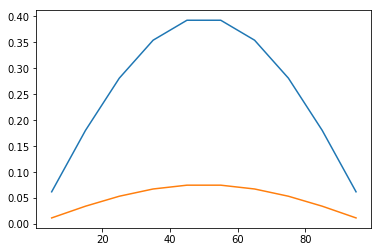

width =  8 , ret =  (43, True) , keff =  0.8118898009813643


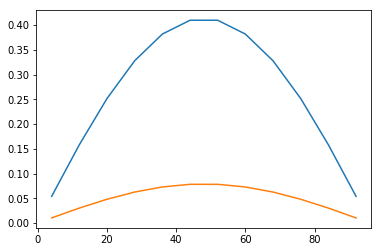

width =  6 , ret =  (42, True) , keff =  0.811796901490407


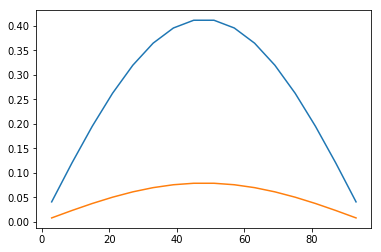

width =  4 , ret =  (44, True) , keff =  0.8146570235120564


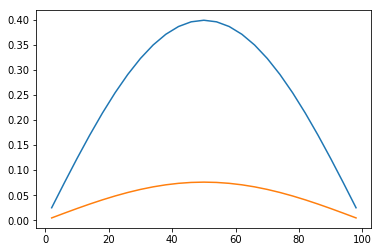

width =  2 , ret =  (53, True) , keff =  0.8146227932063588


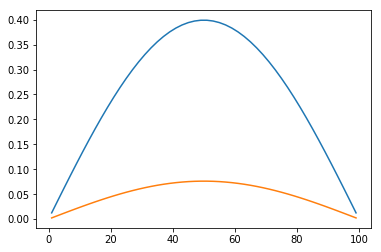

width =  1 , ret =  (81, True) , keff =  0.8146140210849655


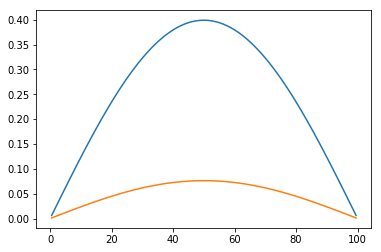

width =  0.5 , ret =  (141, True) , keff =  0.8146114196528297


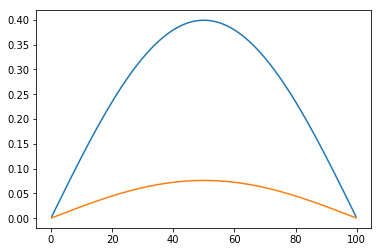

width =  0.25 , ret =  (255, True) , keff =  0.8146098419183391


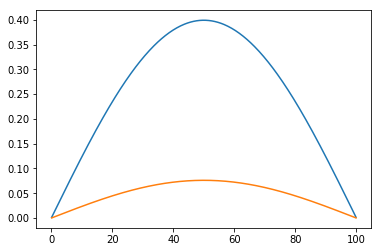

width =  0.1 , ret =  (569, True) , keff =  0.8146065876570209


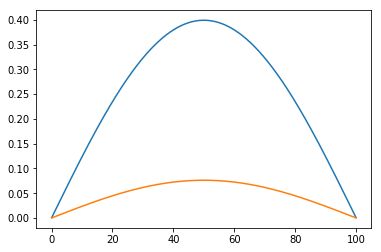

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
keffs = []
widths = [10, 8, 6, 4, 2, 1, 0.5, 0.25, 0.1]
for delta in widths:
    config = { 'geometry':geom, 'mesh_width':delta, "albedo": albedo}
    calc_man = CalculationManager(config)
    ret = calc_man.run()
    keff = calc_man.get_keff()
    print ("width = ", delta, ", ret = ", ret, ", keff = ", keff)
    keffs.append(keff)
    
    flux_dist_0 = calc_man.controller.cont.get_flux_dist(0)
    flux_dist_1 = calc_man.controller.cont.get_flux_dist(1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(flux_dist_0[0], flux_dist_0[1])
    ax.plot(flux_dist_1[0], flux_dist_1[1])
    plt.show()
    

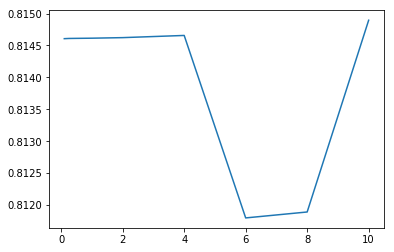

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(widths, keffs)
plt.show()
   

In [14]:
widths2 = list(map(lambda x: x*x, widths))

In [15]:
widths2

[100, 64, 36, 16, 4, 1, 0.25, 0.0625, 0.010000000000000002]

In [16]:
diffs = list(map(lambda x: (x-kana)/kana*100.0, keffs))

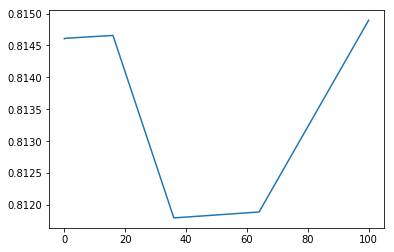

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(widths2, keffs)
plt.show()
   

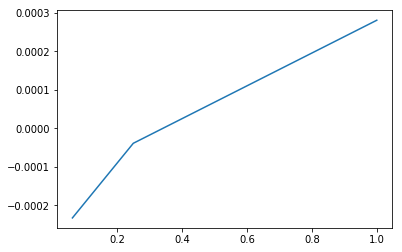

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(widths2[-4:-1], diffs[-4:-1])
plt.show()